In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Load the data
df = pd.read_excel('Marketing Team Data.xlsx')

# Data Validation

### Missing Values

In [3]:
df.isnull().sum()

campaign ID                                     0
Campaign Name                                   0
Audience                                        0
Age                                             0
Geography                                       0
Reach                                           0
Impressions                                     0
Frequency                                       0
Clicks                                          0
Unique Clicks                                   0
Unique Link Clicks (ULC)                        0
Click-Through Rate (CTR in %)                   0
Unique Click-Through Rate (Unique CTR in %)     0
Amount Spent in INR                             0
Cost Per Click (CPC)                            0
Cost per Result (CPR)                           0
@dropdown                                      33
@dropdown.1                                    33
dtype: int64

In [4]:
# Remove the unwanted columns
df.drop(columns=['@dropdown', '@dropdown.1'], inplace=True)

### Data Types

In [5]:
df.dtypes

campaign ID                                     object
Campaign Name                                   object
Audience                                        object
Age                                             object
Geography                                       object
Reach                                            int64
Impressions                                      int64
Frequency                                      float64
Clicks                                           int64
Unique Clicks                                    int64
Unique Link Clicks (ULC)                         int64
Click-Through Rate (CTR in %)                  float64
Unique Click-Through Rate (Unique CTR in %)    float64
Amount Spent in INR                            float64
Cost Per Click (CPC)                           float64
Cost per Result (CPR)                          float64
dtype: object

In [6]:
# Convert “object” to “category” for memory & speed
for col in ['campaign ID','Campaign Name','Audience','Age','Geography']:
    df[col] = df[col].astype('category')

### Range & Comparison Checks

In [7]:
print(f"Rows with Reach ≤ 0:            {len(df[df['Reach'] <= 0])}")
print(f"Rows with Impressions < Reach:  {len(df[df['Impressions'] < df['Reach']])}")
print(f"Rows with Clicks > Impressions: {len(df[df['Clicks'] > df['Impressions']])}")

Rows with Reach ≤ 0:            0
Rows with Impressions < Reach:  0
Rows with Clicks > Impressions: 0


### Numeric Variables Consistency

In [8]:
# Frequency check
freq_mismatch = df[(df['Frequency'] - df['Impressions'] / df['Reach']).abs() > 0.01]

# CTR & Unique CTR checks
ctr_mismatch = df[(df['Click-Through Rate (CTR in %)'] - df['Clicks'] / df['Impressions'] * 100).abs() > 0.1]
uctr_mismatch = df[(df['Unique Click-Through Rate (Unique CTR in %)'] - df['Unique Clicks'] / df['Reach'] * 100).abs() > 0.1]

# CPC & CPR checks
cpc_mismatch = df[(df['Cost Per Click (CPC)'] - df['Amount Spent in INR'] / df['Clicks']).abs() > 0.1]
cpr_mismatch = df[(df['Cost per Result (CPR)'] - df['Amount Spent in INR'] / df['Unique Link Clicks (ULC)']).abs() > 0.1]

print(f"Frequency mismatches:   {len(freq_mismatch)}")
print(f"CTR mismatches:         {len(ctr_mismatch)}")
print(f"Unique CTR mismatches:  {len(uctr_mismatch)}")
print(f"CPC mismatches:         {len(cpc_mismatch)}")
print(f"CPR mismatches:         {len(cpr_mismatch)}")

Frequency mismatches:   0
CTR mismatches:         0
Unique CTR mismatches:  0
CPC mismatches:         0
CPR mismatches:         0


### Outliers & Ranges

In [9]:
len(df[(df['Click-Through Rate (CTR in %)'] < 0) |
    (df['Click-Through Rate (CTR in %)'] > 100) |
    (df['Cost Per Click (CPC)'] < 0) |
    (df['Cost per Result (CPR)'] < 0)
])

0

### Categorical Consistency

In [10]:
for col in ['Audience','Age','Geography']:
    vals = df[col].unique().tolist()
    print(f"\n{col} categories:\n", vals)


Audience categories:
 ['Educators and Principals', 'Students']

Age categories:
 ['25-34', '35-44', '45-54', '55-64', '18-24', '13-17']

Geography categories:
 ['Group 1 (Australia, Canada, United Kingdom, Ghana, Nigeria, Pakistan, United States)', 'Group 2 (Australia, Canada, United Kingdom, Ghana, Niger, Nigeria, Nepal, Pakistan, Thailand, Taiwan)', 'Australia', 'Canada', 'Ghana', 'India', 'Nepal', 'Nigeria', 'UAE', 'UK', 'USA']


In [11]:
# Export df to an Excel file
df.to_excel('Marketing Team Data Update.xlsx', index=False)

# Exploratory Data Analysis

### Plotting Total Reach vs. Impressions for Each Campaign

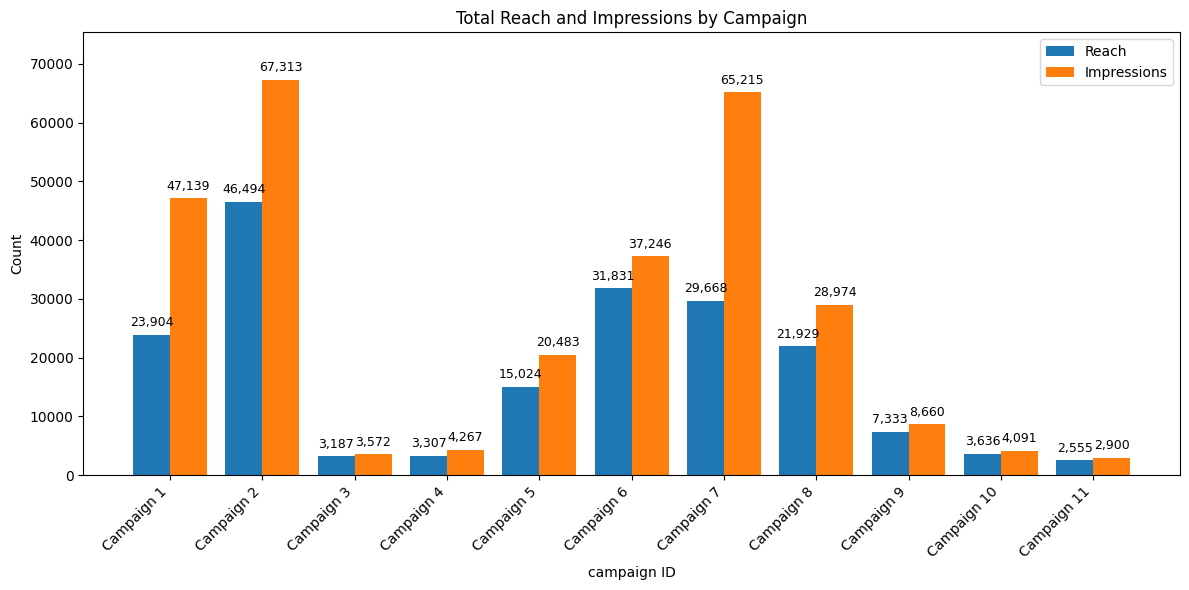

In [47]:
# Aggregate total Reach and Impressions by campaign ID
agg_reach = (
    df
    .groupby('campaign ID', as_index=False)
    .agg({'Reach': 'sum', 'Impressions': 'sum'})
)

# Ordering by numeric campaign number
agg_reach['campaign_num'] = agg_reach['campaign ID'].str.extract(r'(\d+)').astype(int)
agg_reach.sort_values('campaign_num', inplace=True)


x = np.arange(len(agg))
width = 0.4
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, agg_reach['Reach'],       width, label='Reach')
rects2 = ax.bar(x + width/2, agg_reach['Impressions'], width, label='Impressions')
max_val = agg_reach['Impressions'].max()
ax.set_ylim(0, max_val * 1.12)
labels_reach = [f"{v:,}" for v in agg_reach['Reach']]
labels_imp   = [f"{v:,}" for v in agg_reach['Impressions']]
ax.bar_label(rects1, labels=labels_reach, padding=4, fontsize=9)
ax.bar_label(rects2, labels=labels_imp,   padding=4, fontsize=9)
ax.set_xticks(x)
ax.set_xticklabels(agg_reach['campaign ID'], rotation=45, ha='right')
ax.set_xlabel('campaign ID')
ax.set_ylabel('Count')
ax.set_title('Total Reach and Impressions by Campaign')
ax.legend()

plt.tight_layout()
plt.show()

The bar chart compares each campaign’s total reach (blue) against its total impressions (orange), highlighting how many people saw the ads versus how many times they saw them. Campaign 2 and Campaign 7 stand out with the highest reach and impressions, indicating broad exposure, while Campaigns 3 and 4 have very low numbers and might warrant reevaluation. In most campaigns, impressions exceed reach by roughly 1.3–1.5×, suggesting each viewer saw the ads multiple times. Campaign 6 and 8 also show healthy engagement, but smaller campaigns like 10 and 11 delivered minimal impact. Overall, this visualization helps pinpoint which campaigns drove the greatest visibility and which underperformed.

### Plotting CTR vs. Unique CTR by Campaign

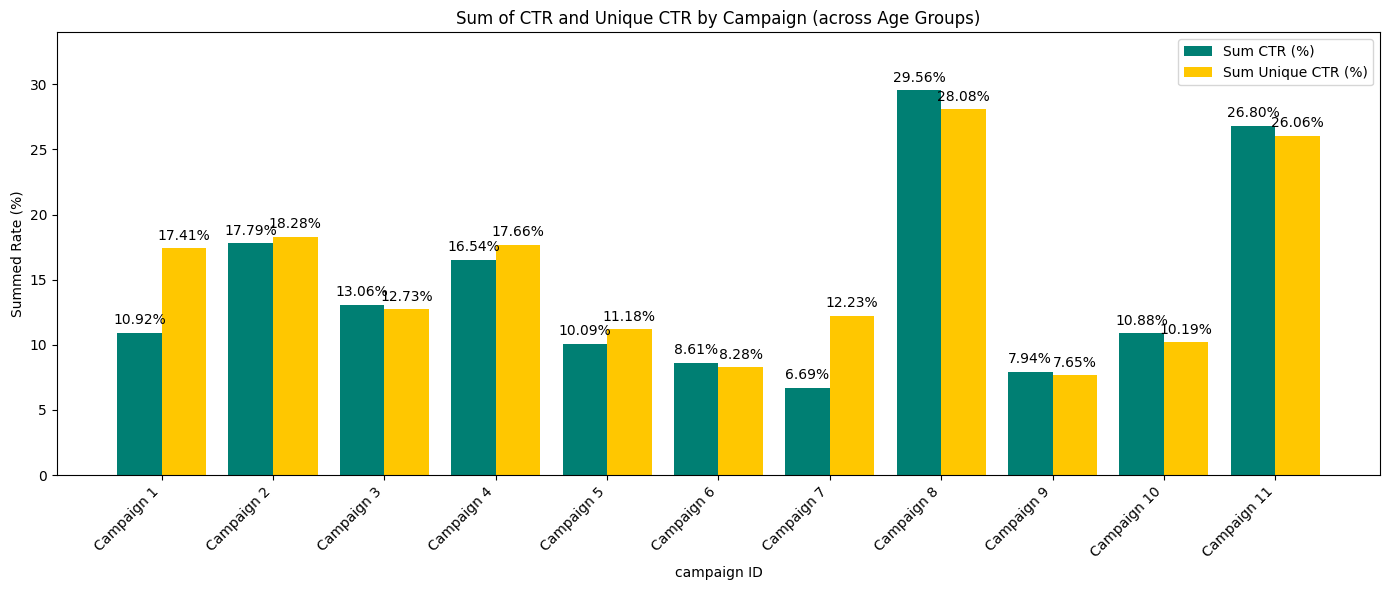

In [48]:
# Sum the age‐group CTR values per campaign
agg_ctr_sum = (
    df
    .groupby('campaign ID', as_index=False)
    .agg({
        'Click-Through Rate (CTR in %)':        'sum',
        'Unique Click-Through Rate (Unique CTR in %)': 'sum'
    })
)

# Extract numeric part for ordering
agg_ctr_sum['campaign_num'] = (
    agg_ctr_sum['campaign ID']
    .str.extract(r'(\d+)')
    .astype(int)
)
agg_ctr_sum.sort_values('campaign_num', inplace=True)


x      = np.arange(len(agg_ctr_sum))
width  = 0.4
fig, ax = plt.subplots(figsize=(14, 6))
bars_ctr  = ax.bar(x - width/2,
                   agg_ctr_sum['Click-Through Rate (CTR in %)'],
                   width, label='Sum CTR (%)',
                   color='#007F73')
bars_uctr = ax.bar(x + width/2,
                   agg_ctr_sum['Unique Click-Through Rate (Unique CTR in %)'],
                   width, label='Sum Unique CTR (%)',
                   color='#FFC700')

max_val = max(
    agg_ctr_sum['Click-Through Rate (CTR in %)'].max(),
    agg_ctr_sum['Unique Click-Through Rate (Unique CTR in %)'].max()
)
ax.set_ylim(0, max_val * 1.15)

# Annotate with summed values
labels_ctr  = [f"{v:.2f}%" for v in agg_ctr_sum['Click-Through Rate (CTR in %)']]
labels_uctr = [f"{v:.2f}%" for v in agg_ctr_sum['Unique Click-Through Rate (Unique CTR in %)']]
ax.bar_label(bars_ctr,  labels=labels_ctr,  padding=4, fontsize=10)
ax.bar_label(bars_uctr, labels=labels_uctr, padding=4, fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(agg_ctr_sum['campaign ID'], rotation=45, ha='right')
ax.set_xlabel('campaign ID')
ax.set_ylabel('Summed Rate (%)')
ax.set_title('Sum of CTR and Unique CTR by Campaign (across Age Groups)')
ax.legend()
plt.tight_layout()
plt.show()


Here we’ve summed click-through rates (CTR) and unique click-through rates across all age groups for each campaign. Campaigns 8 and 11 stand out with the highest overall click engagement, while Campaigns 6 and 9 lag behind. The green bars (CTR) and gold bars (Unique CTR) sit almost neck-and-neck, suggesting most clicks are coming from first-time viewers rather than repeat clickers.

### 100% Stacked Bar Chart: CTR vs. Unique CTR Composition by Campaign

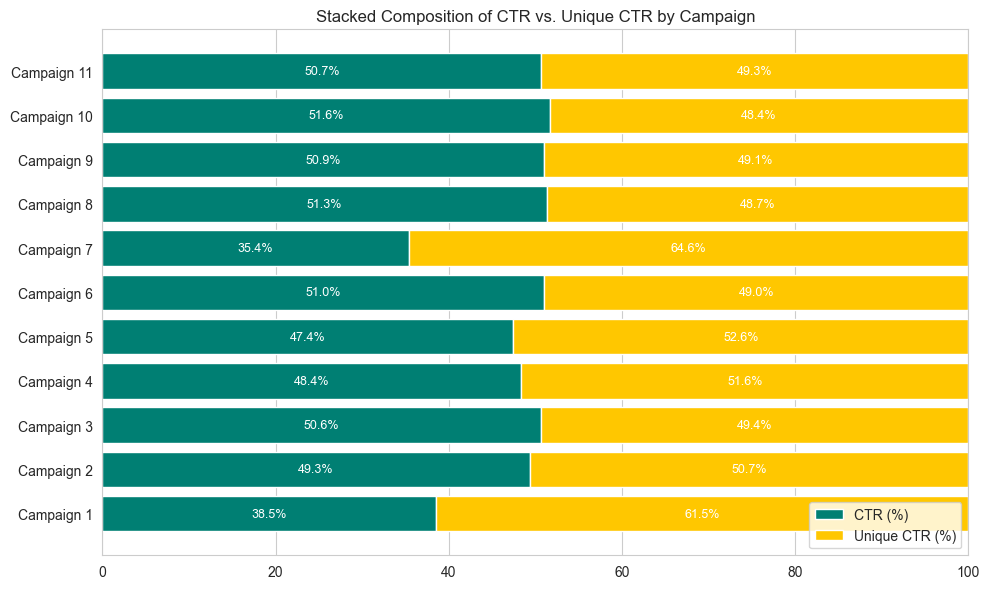

In [116]:
agg_ctr_sum['campaign_num'] = (
    agg_ctr_sum['campaign ID']
    .str.extract(r'(\d+)')
    .astype(int)
)
agg_ctr_sum.sort_values('campaign_num', inplace=True)

# Compute each series’ share of the total 
agg_ctr_sum['Total']    = agg_ctr_sum['Click-Through Rate (CTR in %)'] + agg_ctr_sum['Unique Click-Through Rate (Unique CTR in %)']
agg_ctr_sum['pct_ctr']  = agg_ctr_sum['Click-Through Rate (CTR in %)']        / agg_ctr_sum['Total'] * 100
agg_ctr_sum['pct_uctr'] = agg_ctr_sum['Unique Click-Through Rate (Unique CTR in %)'] / agg_ctr_sum['Total'] * 100


y = np.arange(len(agg_ctr_sum))
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(y, agg_ctr_sum['pct_ctr'],  color='#007F73', label='CTR (%)')
ax.barh(y, agg_ctr_sum['pct_uctr'], left=agg_ctr_sum['pct_ctr'], color='#FFC700', label='Unique CTR (%)')
for i, (ctr, uctr) in enumerate(zip(agg_ctr_sum['pct_ctr'], agg_ctr_sum['pct_uctr'])):
    ax.text(ctr / 2,       i, f"{ctr:.1f}%",  va='center', ha='center', color='white', fontsize=9)
    ax.text(ctr + uctr/2,  i, f"{uctr:.1f}%", va='center', ha='center', color='white', fontsize=9)

ax.set_yticks(y)
ax.set_yticklabels(agg_ctr_sum['campaign ID'])
ax.set_xlim(0, 100)
ax.set_title('Stacked Composition of CTR vs. Unique CTR by Campaign')
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()

This normalized, horizontal plot breaks down each campaign’s total clicks into “repeat clicks” (CTR) versus “first-time clicks” (Unique CTR). Campaign 7 flips the pattern, with more unique than total CTR, hinting at fresh interest. Most others hover around a 50/50 split, showing that roughly half of the clicks come from new eyeballs and half from repeat clickers.

### Plotting Total Amount Spent (INR) by Campaign

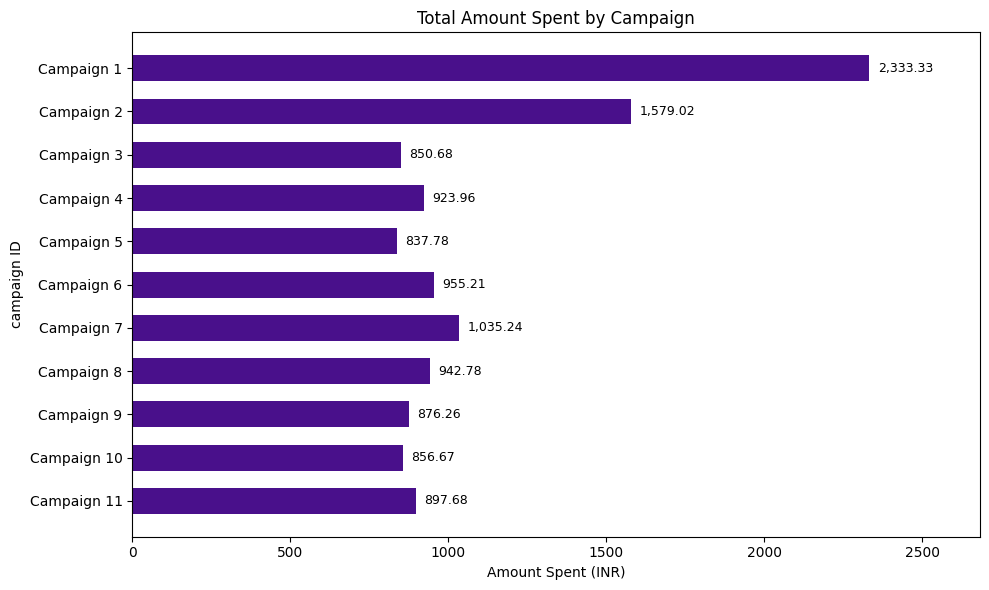

In [49]:
# Aggregate total Amount Spent by campaign
agg_spend = (
    df
    .groupby('campaign ID', as_index=False)
    .agg({'Amount Spent in INR':'sum'})
)

# Extract numeric part for natural ordering
agg_spend['campaign_num'] = (
    agg_spend['campaign ID']
    .str.extract(r'(\d+)')
    .astype(int)
)
agg_spend.sort_values('campaign_num', inplace=True)

campaigns = agg_spend['campaign ID']
values    = agg_spend['Amount Spent in INR']
y_pos     = np.arange(len(campaigns))

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(y_pos, values, color='#49108B', height=0.6)
ax.set_xlim(0, values.max() * 1.15)

labels = [f"{v:,.2f}" for v in values]
ax.bar_label(bars, labels=labels, padding=6, fontsize=9)
ax.set_yticks(y_pos)
ax.set_yticklabels(campaigns)
ax.set_xlabel('Amount Spent (INR)')
ax.set_ylabel('campaign ID')
ax.set_title('Total Amount Spent by Campaign')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

A simple horizontal bar chart of total campaign spend. Campaign 1 leads the pack at over ₹2,300, while smaller efforts like Campaign 3 and 5 are each under ₹1,000. This lets you quickly compare budgets and spot where you might want to reallocate dollars for better ROI.

### Bubble Plot: Frequency vs. CTR (size ∝ Reach, color ∝ Spend)

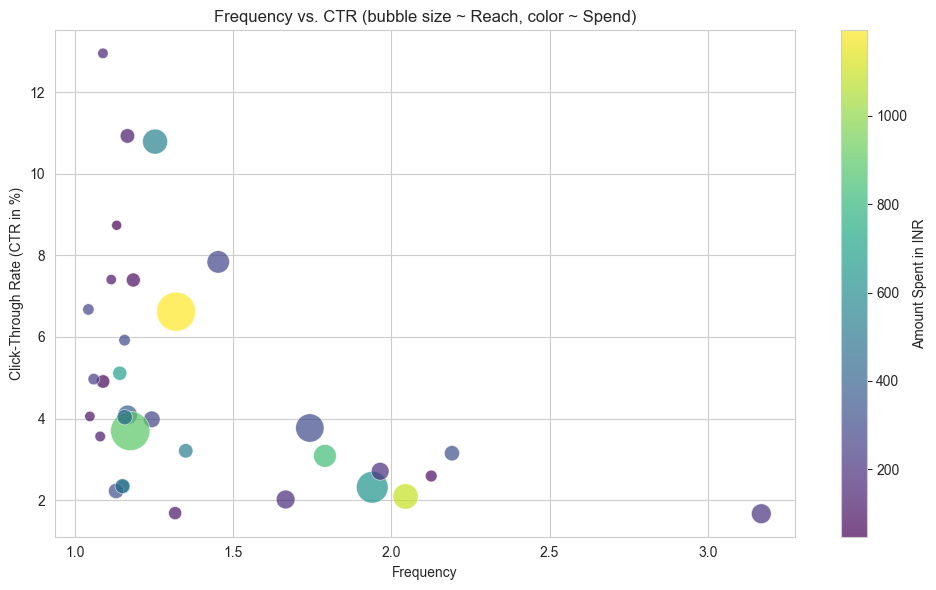

In [62]:
max_reach = df['Reach'].max()
# Scale
size_min = 50
size_max = 800
size_norm = ((df['Reach'] / max_reach) * (size_max - size_min)) + size_min

# Bubble plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['Frequency'],
    df['Click-Through Rate (CTR in %)'],
    s=size_norm,
    c=df['Amount Spent in INR'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='w',
    linewidth=0.5
)
cbar = plt.colorbar(scatter)
cbar.set_label('Amount Spent in INR')

plt.xlabel('Frequency')
plt.ylabel('Click-Through Rate (CTR in %)')
plt.title('Frequency vs. CTR (bubble size ~ Reach, color ~ Spend)')

plt.tight_layout()
plt.show()

This scatter-bubble chart compares how often people saw an ad (frequency) against how often they clicked (CTR). Bubble size reflects reach, and color shows spend. You can spot the “sweet spot” around frequency 1.1–1.3 with high CTRs and mid-sized spends, and avoid overexposed audiences (freq > 2.0) where CTR drops.

### Heatmap: Total Reach by Campaign and Age Group

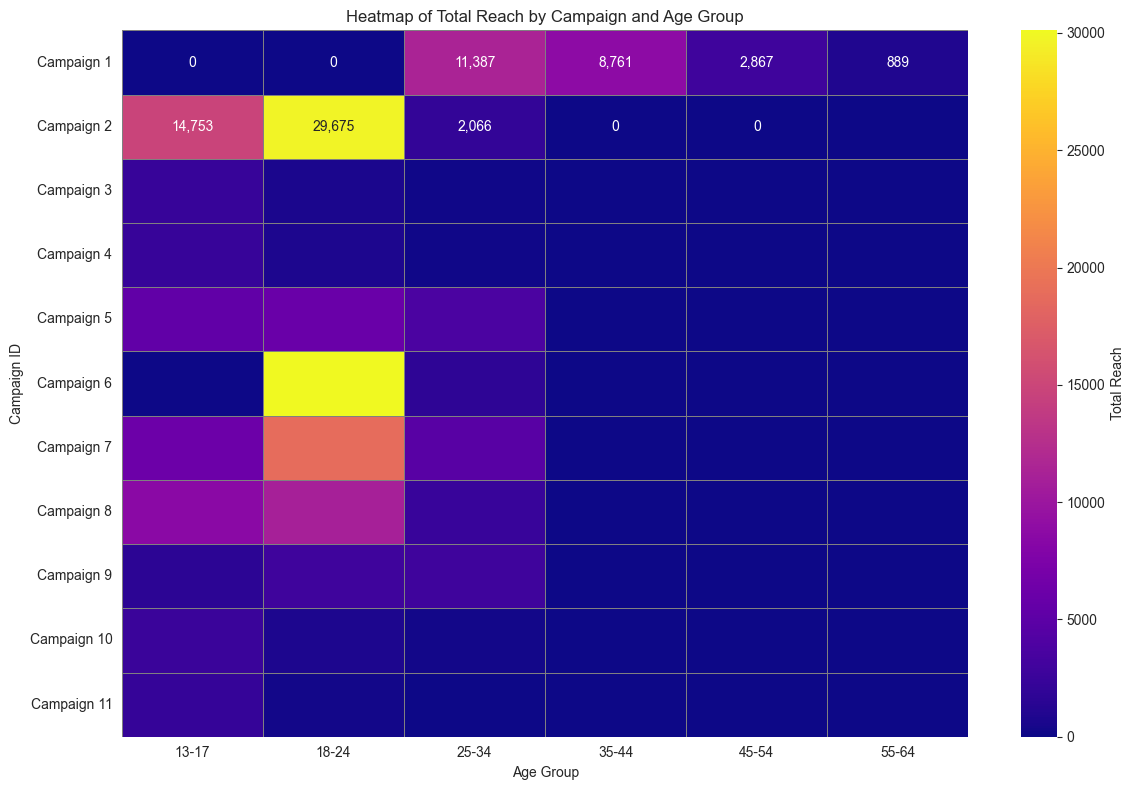

In [78]:
pivot_reach = df.pivot_table(
    index='campaign ID',
    columns='Age',
    values='Reach',
    aggfunc='sum',
    fill_value=0
)

campaign_order = sorted(
    pivot_reach.index, 
    key=lambda cid: int(cid.split()[-1])
)
age_order = ['13-17', '18-24', '25-34', '35-44', '45-54', '55-64']

pivot_reach = pivot_reach.reindex(index=campaign_order, columns=age_order)

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_reach,
    annot=True,
    fmt=',d',
    cmap='plasma',
    cbar_kws={'label': 'Total Reach'},
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Heatmap of Total Reach by Campaign and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Campaign ID')
plt.tight_layout()
plt.show()

The heatmap clearly shows that the highest reach occurs in the 18–24 bracket—especially for Campaigns 2 and 6 with over 30,000 impressions—followed closely by 25–34. Across nearly all campaigns, younger audiences (18–34) overwhelmingly drive impressions, while the older 45–54 and 55–64 segments barely register. Campaign 1 is an exception, with its strongest reach in the 25–34 and 35–44 groups, indicating a slightly older target. Overall, these patterns suggest reallocating budget toward the high-performing 18–34 age range (or experimenting with underperforming segments) to boost efficiency.

### Bar Chart: Total Reach by Age Group (Descending)

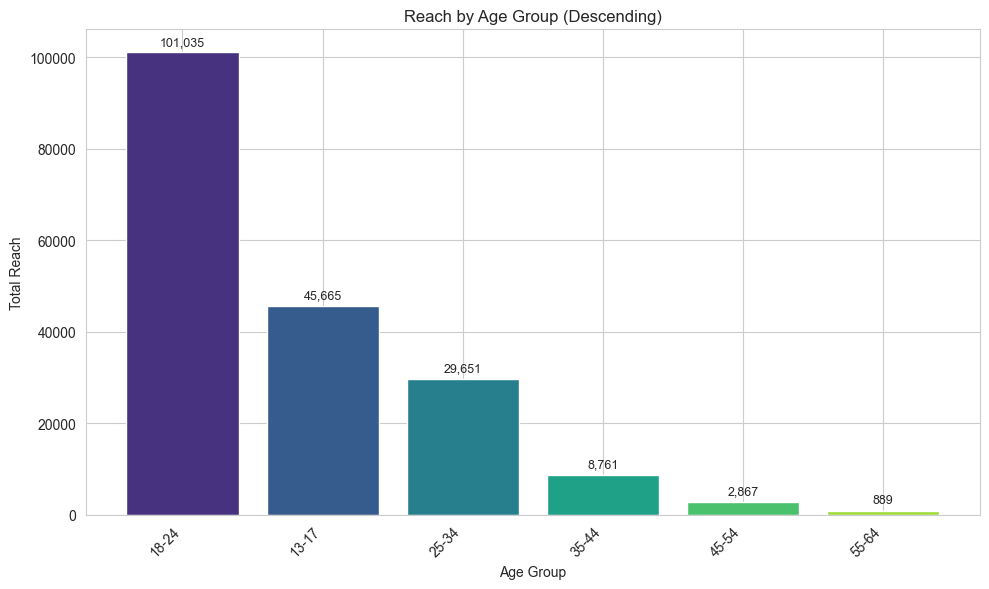

In [149]:
reach_by_age = df.groupby('Age', as_index=True)['Reach'].sum()
reach_by_age = reach_by_age.sort_values(ascending=False)

num_categories = len(reach_by_age)

if num_categories <= 5:
    
    plt.figure(figsize=(8, 8))
    colors = sns.color_palette("pastel", num_categories)
    reach_by_age.plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        counterclock=False,
        explode=[0.05] + [0]*(num_categories-1)  
    )
    plt.ylabel('')
    plt.title('Reach Composition by Age Group')
    plt.tight_layout()
    plt.show()
else:

    plt.figure(figsize=(10, 6))
    bars = plt.bar(
        reach_by_age.index,
        reach_by_age.values,
        color=sns.color_palette("viridis", num_categories)
    )
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Age Group')
    plt.ylabel('Total Reach')
    plt.title('Reach by Age Group (Descending)')

    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            yval + reach_by_age.max()*0.01,
            f'{int(yval):,}',
            ha='center',
            va='bottom',
            fontsize=9
        )
    plt.tight_layout()
    plt.show()

Here we can see total reach aggregated across all campaigns, sorted from largest (18–24) to smallest (55–64). Over 100K unique users were aged 18–24, while seniors barely registered. This confirms that ads are resonating primarily with the younger demographic.

### Small Multiples: Pie Charts of Reach Distribution by Age for Each Campaign

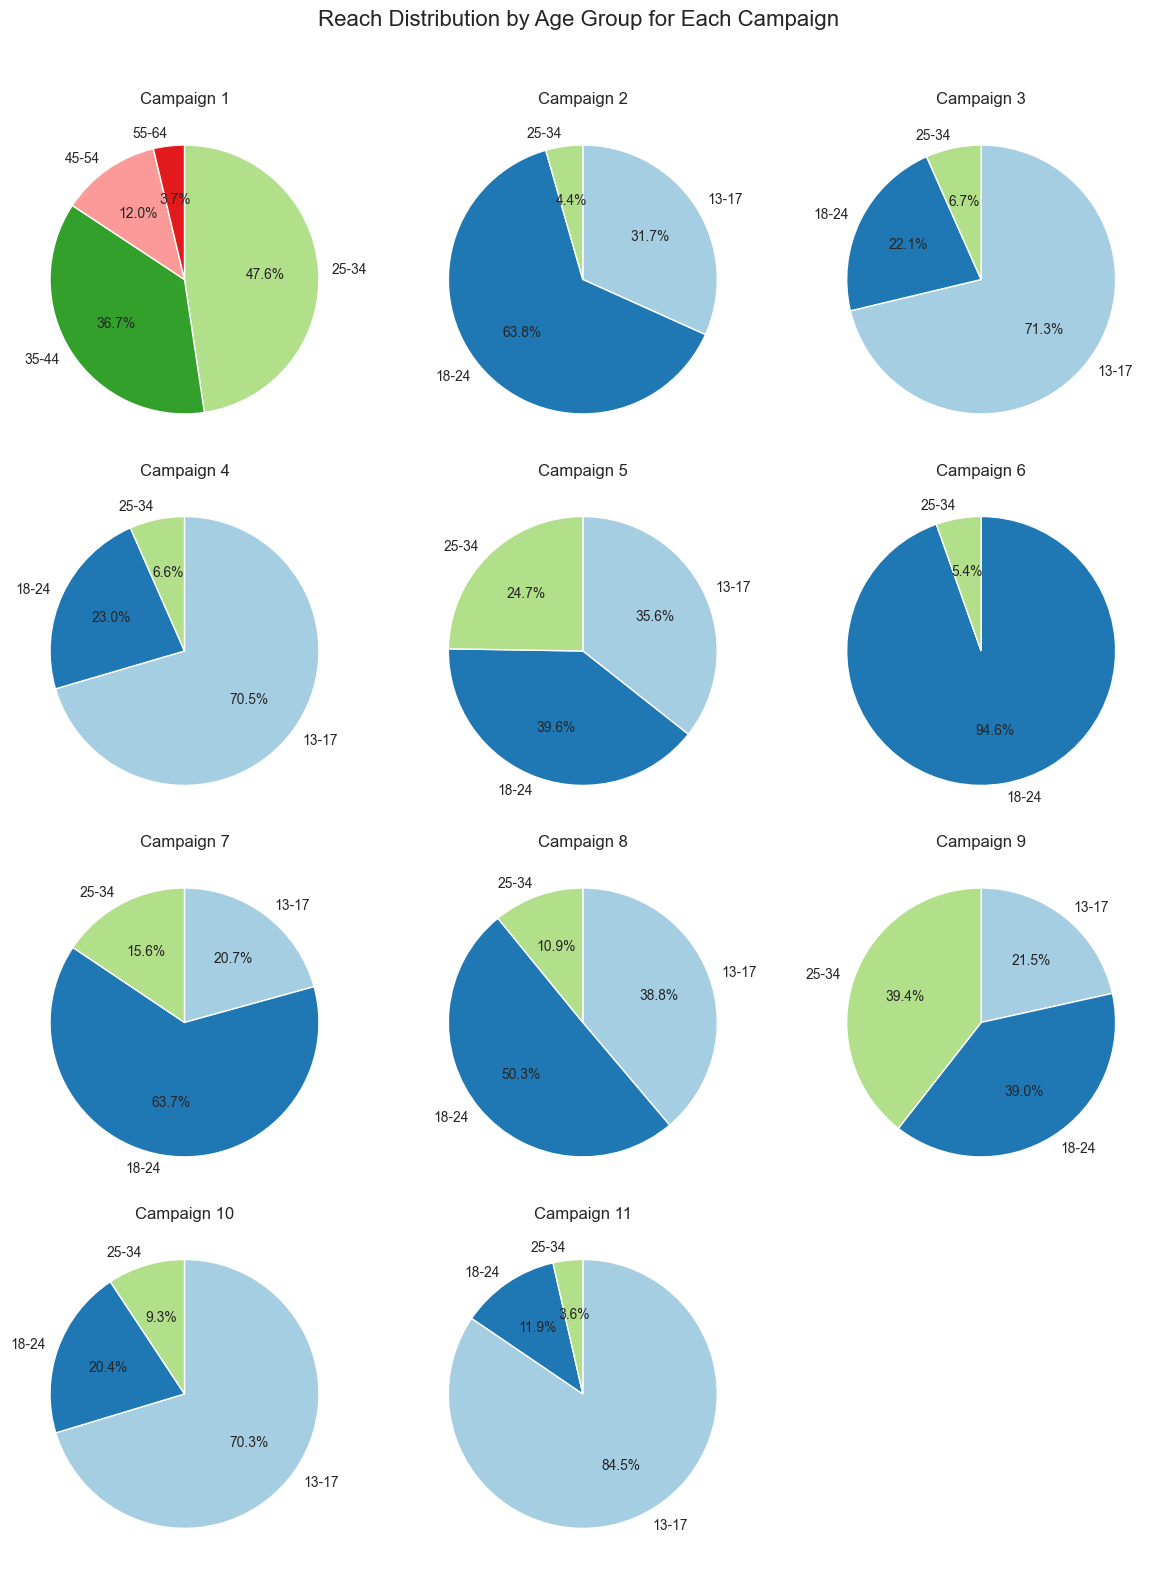

In [110]:
# Pivot to get total Reach per [campaign ID, Age], filling missing combos with 0
pivot_reach = df.pivot_table(
    index='campaign ID',
    columns='Age',
    values='Reach',
    aggfunc='sum',
    fill_value=0
)

#  Ensure natural ordering of campaigns and age groups
campaign_order = sorted(
    pivot_reach.index,
    key=lambda cid: int(cid.split()[-1])
)
age_order = ['13-17', '18-24', '25-34', '35-44', '45-54', '55-64']

pivot_reach = pivot_reach.reindex(index=campaign_order, columns=age_order)

base_palette = sns.color_palette("Paired", len(age_order))
n_camps = len(pivot_reach)
ncols = 3
nrows = int(np.ceil(n_camps / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4))
axes = axes.flatten()

# Plot a pie chart for each campaign
for ax, (camp, row) in zip(axes, pivot_reach.iterrows()):
    sizes = row.values
    nonzero = sizes > 0
    labels = np.array(age_order)[nonzero]
    vals   = sizes[nonzero]
    colors = list(np.array(base_palette)[nonzero])
    
    ax.pie(
        vals,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1}
    )
    ax.set_title(camp, fontsize=12)

for ax in axes[n_camps:]:
    ax.axis('off')

plt.suptitle('Reach Distribution by Age Group for Each Campaign', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

A bank of pie charts showing each campaign’s age-group mix. Campaigns 3, 4, 7, 10, and 11 skew heavily into the 13–17 bracket, whereas Campaign 1 leans older (35–44). These visuals help tailor future messaging by campaign to the age segments you’re actually hitting.

### 100% Stacked Bar: Click vs. Unique vs. ULC Composition by Campaign

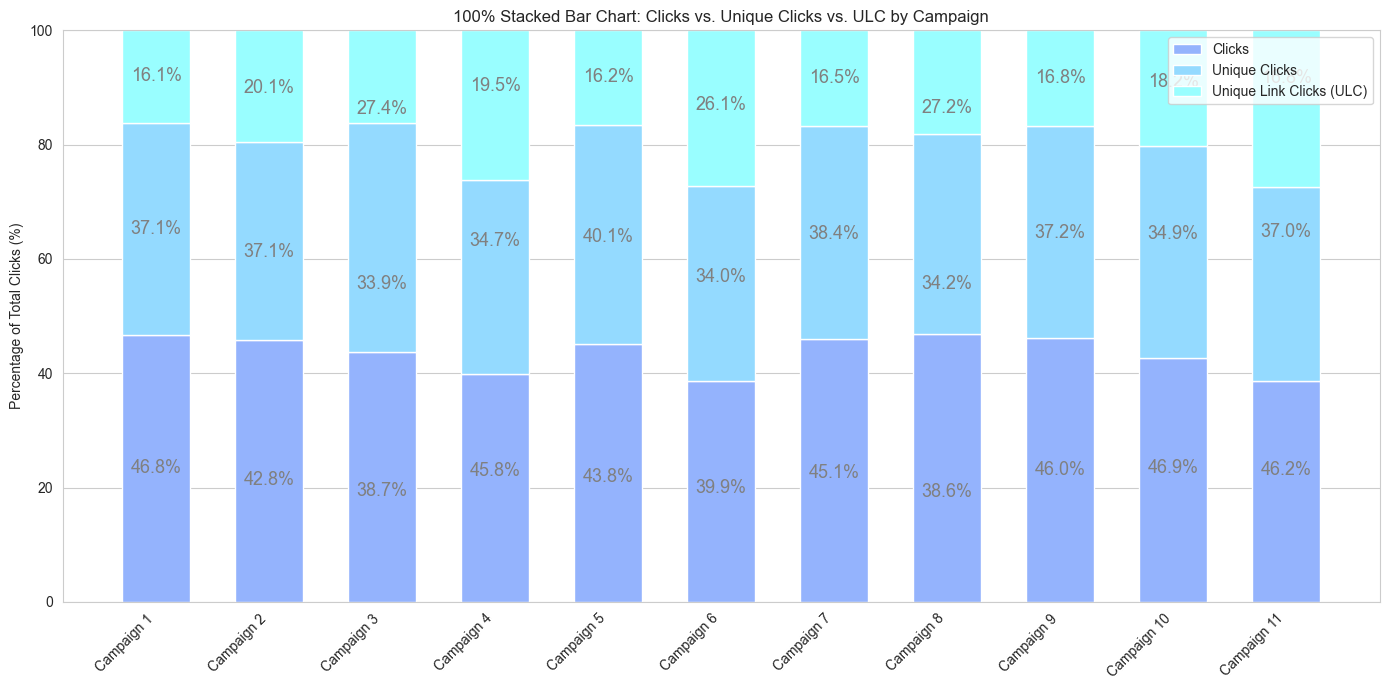

In [134]:
# Aggregate totals per campaign
agg_click = (
    df
    .groupby('campaign ID', as_index=False)
    .agg({
        'Clicks':                   'sum',
        'Unique Clicks':            'sum',
        'Unique Link Clicks (ULC)': 'sum'
    })
)

cols = ['Clicks', 'Unique Clicks', 'Unique Link Clicks (ULC)']
agg_click['Total'] = agg_click[cols].sum(axis=1)
for col in cols:
    agg_click[f'pct_{col}'] = agg_click[col] / agg_click['Total'] * 100

agg_click['campaign_num'] = (
    agg_click['campaign ID']
    .str.extract(r'(\d+)').astype(int)
)
agg_click.sort_values('campaign_num', inplace=True)

x = np.arange(len(agg_click))
width = 0.6
fig, ax = plt.subplots(figsize=(14, 7))

colors = ['#94B3FD', '#94DAFF', '#99FEFF']
labels = ['Clicks', 'Unique Clicks', 'Unique Link Clicks (ULC)']

bottom = np.zeros(len(agg_click))
for col, color, label in zip(cols, colors, labels):
    pct = agg_click[f'pct_{col}']
    ax.bar(x, pct, width, bottom=bottom, color=color, label=label)
    bottom += pct

for i in x:
    y0 = 0
    for col in cols:
        pct_val = agg_click.loc[agg_click.index == i, f'pct_{col}'].values[0]
        if pct_val > 5:  # only annotate segments larger than 5%
            ax.text(
                i,
                y0 + pct_val/2,
                f"{pct_val:.1f}%",
                ha='center',
                va='center',
                color='grey',
                fontsize=13
            )
        y0 += pct_val

ax.set_xticks(x)
ax.set_xticklabels(agg_click['campaign ID'], rotation=45, ha='right')
ax.set_ylabel('Percentage of Total Clicks (%)')
ax.set_title('100% Stacked Bar Chart: Clicks vs. Unique Clicks vs. ULC by Campaign')
ax.set_ylim(0, 100)
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

Each bar adds up to 100% of clicks and breaks down into total clicks, unique clicks, and unique link clicks. Most campaigns land between 35–50% for each bucket, but Campaign 6 shows a surprisingly large share of unique link clicks (~27%), implying deeper engagement per user.

### Plotting Cost Per Click (CPC) and Cost per Result (CPR) by Campaign

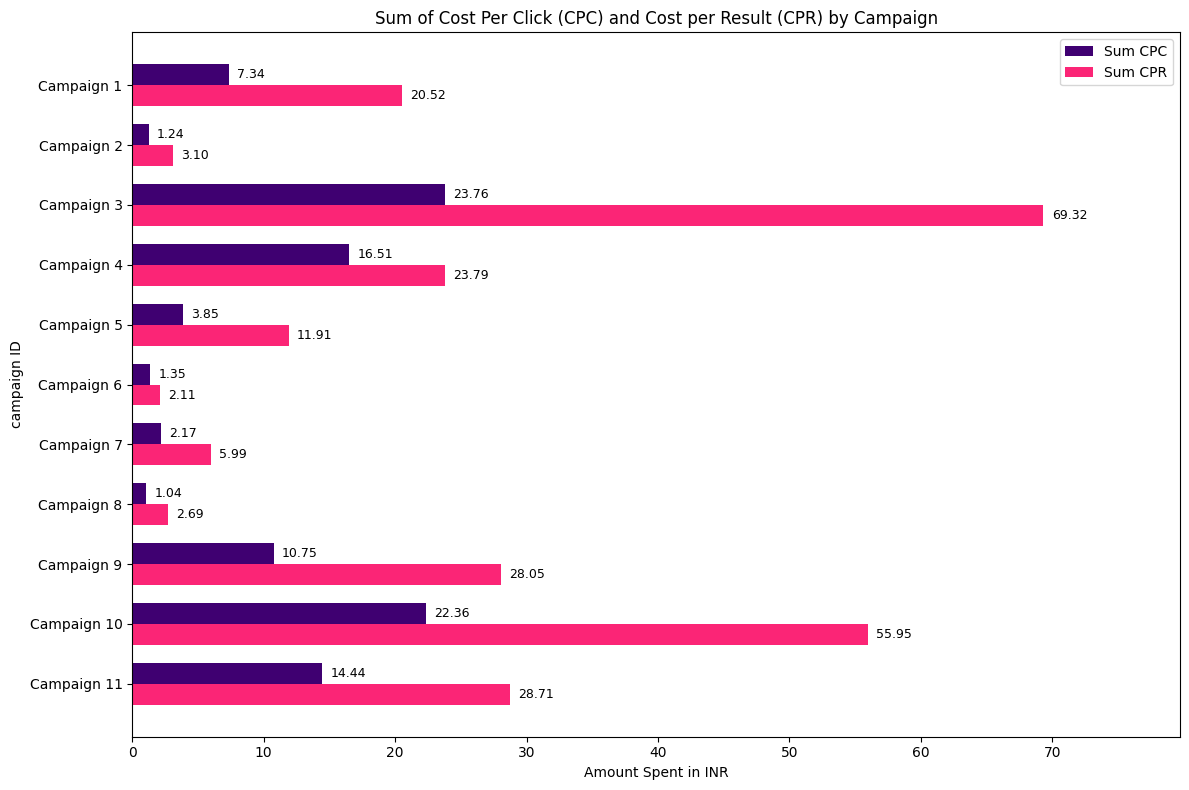

In [53]:
# Aggregate total CPC & CPR by campaign
agg_cost = (
    df
    .groupby('campaign ID', as_index=False, observed=False)
    .agg({
        'Cost Per Click (CPC)': 'sum',
        'Cost per Result (CPR)': 'sum'
    })
)

# Natural ordering by campaign number
agg_cost['campaign_num'] = (
    agg_cost['campaign ID']
    .str.extract(r'(\d+)')
    .astype(int)
)
agg_cost.sort_values('campaign_num', inplace=True)

campaigns = agg_cost['campaign ID']
cpc_vals  = agg_cost['Cost Per Click (CPC)']
cpr_vals  = agg_cost['Cost per Result (CPR)']
y_pos     = np.arange(len(campaigns))
height    = 0.35

fig, ax = plt.subplots(figsize=(12, 8))
bars_cpc = ax.barh(y_pos - height/2, cpc_vals, height,
                   color='#3F0071', label='Sum CPC')
bars_cpr = ax.barh(y_pos + height/2, cpr_vals, height,
                   color='#FB2576', label='Sum CPR')

ax.set_xlim(0, max(cpc_vals.max(), cpr_vals.max()) * 1.15)

# Annotate each bar with formatted values
labels_cpc = [f"{v:.2f}" for v in cpc_vals]
labels_cpr = [f"{v:.2f}" for v in cpr_vals]
ax.bar_label(bars_cpc, labels=labels_cpc, padding=6, fontsize=9)
ax.bar_label(bars_cpr, labels=labels_cpr, padding=6, fontsize=9)
ax.set_yticks(y_pos)
ax.set_yticklabels(campaigns)
ax.set_xlabel('Amount Spent in INR')
ax.set_ylabel('campaign ID')
ax.set_title('Sum of Cost Per Click (CPC) and Cost per Result (CPR) by Campaign')
ax.invert_yaxis() 
ax.legend()

plt.tight_layout()
plt.show()

Each campaign’s total CPC (purple) and CPR (pink) are shown side by side. Campaign 3’s CPR towers over the rest, meaning it was expensive to get a result there, whereas Campaign 2 achieved rock-bottom CPC. This helps you flag campaigns that are burning through budget too quickly on a per-click or per-result basis.

### CPC & CPR of Campaigns: Bar (CPC) + Line (CPR)

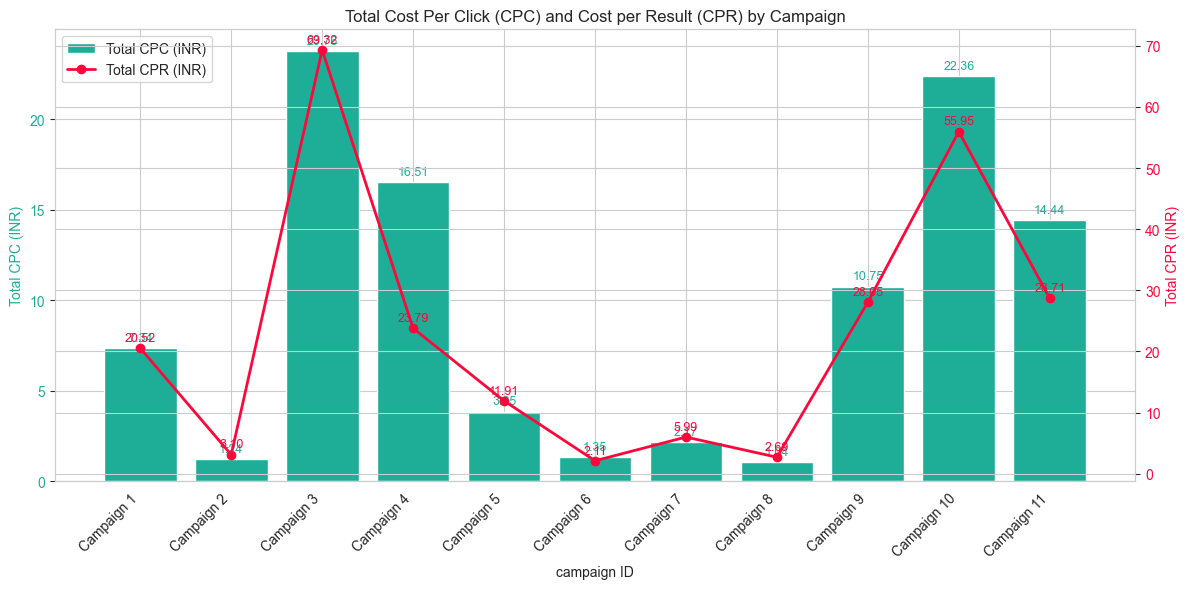

In [145]:
# Aggregate total CPC & CPR per campaign
agg_cost = (
    df
    .groupby('campaign ID', as_index=False)
    .agg({
        'Cost Per Click (CPC)': 'sum',
        'Cost per Result (CPR)': 'sum'
    })
)

agg_cost['campaign_num'] = (
    agg_cost['campaign ID']
    .str.extract(r'(\d+)')
    .astype(int)
)
agg_cost.sort_values('campaign_num', inplace=True)

x = np.arange(len(agg_cost))
fig, ax1 = plt.subplots(figsize=(12, 6))

cpc_bars = ax1.bar(
    x,
    agg_cost['Cost Per Click (CPC)'],
    color='#1EAE98',
    label='Total CPC (INR)'
)
ax1.set_xlabel('campaign ID')
ax1.set_ylabel('Total CPC (INR)', color='#1EAE98')
ax1.tick_params(axis='y', labelcolor='#1EAE98')
ax1.set_xticks(x)
ax1.set_xticklabels(agg_cost['campaign ID'], rotation=45, ha='right')

for i, v in enumerate(agg_cost['Cost Per Click (CPC)']):
    ax1.text(i, v + agg_cost['Cost Per Click (CPC)'].max()*0.01,
             f'{v:.2f}', ha='center', va='bottom', color='#1EAE98', fontsize=9)

ax2 = ax1.twinx()
cpr_line, = ax2.plot(
    x,
    agg_cost['Cost per Result (CPR)'],
    color='#FF073A',
    marker='o',
    linewidth=2,
    label='Total CPR (INR)'
)
ax2.set_ylabel('Total CPR (INR)', color='#FF073A')
ax2.tick_params(axis='y', labelcolor='#FF073A')


for i, v in enumerate(agg_cost['Cost per Result (CPR)']):
    ax2.text(i, v + agg_cost['Cost per Result (CPR)'].max()*0.01,
             f'{v:.2f}', ha='center', va='bottom', color='#FF073A', fontsize=9)

# Combine 
lines, labels = [], []
for ax in (ax1, ax2):
    line, label = ax.get_legend_handles_labels()
    lines += line
    labels += label
ax1.legend(lines, labels, loc='upper left')

plt.title('Total Cost Per Click (CPC) and Cost per Result (CPR) by Campaign')
plt.tight_layout()
plt.show()

A dual-axis plot where the green bars show each campaign’s total cost per click, and the green line marks cost per result. Campaign 3 emerges as the costliest in both metrics, while Campaign 2 remains the most budget-efficient. This combined view makes trade-offs between click cost and result cost crystal clear.

Discontinue Campaigns 3, 9, and 10: These three campaigns deliver the highest cost per result (CPR of ~₹69, ₹28, and ₹56 respectively) on only moderate to low scale, making them clear budget drains.
Adopt Campaign 2 as the benchmark: With the lowest CPR (≈₹3) paired with strong reach and engagement, its targeting and creative approach should guide all future efforts.
Scale Campaigns 6 and 8: Both maintain a sub-₹5 CPR alongside healthy CTR and reach—ideal candidates for increased investment to maximize ROI.
Reevaluate Campaign 1: Although it achieves good reach, its mid-range CPR (≈₹20) suggests that tweaking audience segments or messaging could improve cost efficiency.
Test and optimize Campaigns 4 and 5: Sitting in the middle (CPR of ≈₹24 and ₹12), these could benefit from targeted A/B tests on creative elements or bidding strategies before committing additional budget.